In [3]:
from HawkesPyLib.simulation import ApproxPowerlawHawkesProcessSimulation
from HawkesPyLib.inference import ApproxPowerlawHawkesProcessInference, ExpHawkesProcessInference
import matplotlib.pyplot as plt
import numpy as np


In [4]:
# Initilize the simulator with some example parameters:

mu = 2
eta = 0.5
alpha = 0.4
tau0 = 0.05
m = 5.0
M = 5
PowlawSimulator = ApproxPowerlawHawkesProcessSimulation("powlaw", mu, eta, alpha, tau0, m, M )

# simulate arrival times
timestamps = PowlawSimulator.simulate(T=1000, seed= -1)
print(f"{PowlawSimulator.n_jumps} timestamps were simulated")

4005 timestamps were simulated


In [5]:
# Initilize the Estimator class
PowlawEstimator = ApproxPowerlawHawkesProcessInference("powlaw", m=5.0, M=5)

# Estimate parameters
mu_hat, eta_hat, alpha_hat, tau0_hat = PowlawEstimator.estimate_grid(timestamps, T=timestamps[-1], return_params=True)

print(f"Estimated mu: {mu_hat:.2f}, vs. simulated mu: {mu}")
print(f"Estimated eta: {eta_hat:.2f}, vs. simulated eta: {eta}")
print(f"Estimated alpha: {alpha_hat:.2f}, vs. simulated alpha: {alpha}")
print(f"Estimated tau0: {tau0_hat:.2f}, vs. simulated tau0: {tau0}")

Estimated mu: 1.77, vs. simulated mu: 2
Estimated eta: 0.56, vs. simulated eta: 0.5
Estimated alpha: 0.27, vs. simulated alpha: 0.4
Estimated tau0: 0.04, vs. simulated tau0: 0.05


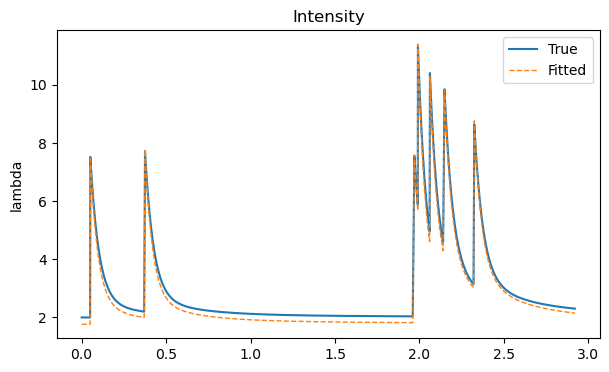

In [6]:
# compute the estimated and the true intensity
step_size = 0.01
intensity_true = PowlawSimulator.intensity(step_size)
intensity_fitted = PowlawEstimator.intensity(step_size)

# plot intensity
fig, ax = plt.subplots(1, figsize=(7, 4))
end = 300
start = 0
ax.plot(intensity_true[start:end, 0], intensity_true[start:end, 1], label="True")
ax.plot(intensity_fitted[start:end:, 0], intensity_fitted[start:end, 1], label="Fitted", linewidth=1, linestyle="dashed")
ax.set_title("Intensity")
ax.set_ylabel("lambda")
ax.legend()


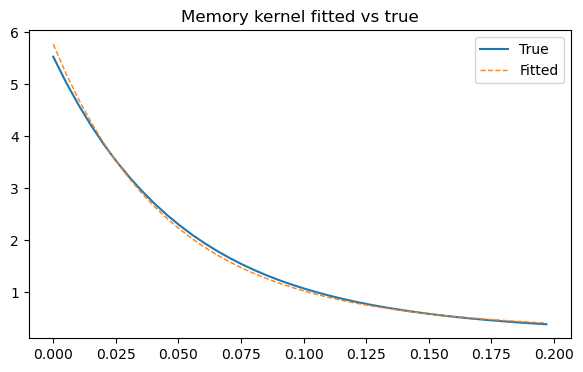

In [7]:
# compute the memory kernel values
times = np.linspace(0, 0.5, 10**2)
kernel_true = PowlawSimulator.kernel_values(times)
kernel_fitted = PowlawEstimator.kernel_values(times)

# plot kernel
fig, ax = plt.subplots(1, figsize=(7, 4))
end = 40
start = 0
ax.plot(times[start:end], kernel_true[start:end], label="True")
ax.plot(times[start:end], kernel_fitted[start:end], label="Fitted", linewidth=1, linestyle="dashed")
ax.set_title("Memory kernel fitted vs true")
ax.legend()



In [8]:
# Instead of estimating the simulated process with the exact same kernel we estimate under misspecifcation using 
# the single exponential memory kernel Hawkes process specification
ExpoEstimator = ExpHawkesProcessInference()

# Estimate paramters
mu_hat, eta_hat, theta_hat = ExpoEstimator.estimate_grid(timestamps, T=timestamps[-1], return_params=True)

print(f"Estimated mu: {mu_hat:.2f}, vs. simulated mu: {mu}")
print(f"Estimated eta: {eta_hat:.2f}, vs. simulated eta: {eta}")


Estimated mu: 2.55, vs. simulated mu: 2
Estimated eta: 0.36, vs. simulated eta: 0.5


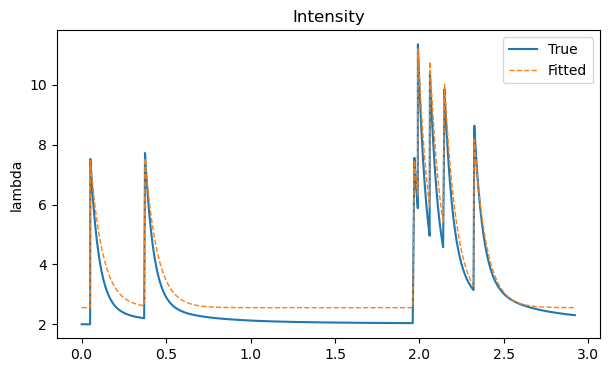

In [9]:
# compute the estimated and the true intensity
step_size = 0.01
intensity_true = PowlawSimulator.intensity(step_size)
intensity_fitted = ExpoEstimator.intensity(step_size)

# plot intensity
fig, ax = plt.subplots(1, figsize=(7, 4))
end = 300
start = 0
ax.plot(intensity_true[start:end, 0], intensity_true[start:end, 1], label="True")
ax.plot(intensity_fitted[start:end:, 0], intensity_fitted[start:end, 1], label="Fitted", linewidth=1, linestyle="dashed")
ax.set_title("Intensity")
ax.set_ylabel("lambda")
ax.legend()





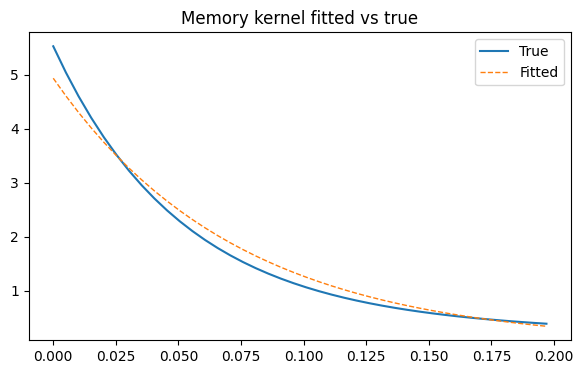

In [9]:
# compute the memory kernel values
times = np.linspace(0, 0.5, 10**2)
kernel_true = PowlawSimulator.kernel_values(times)
kernel_fitted = ExpoEstimator.kernel_values(times)

# plot memory kernel
fig, ax = plt.subplots(1, figsize=(7, 4))
end = 40
start = 0
ax.plot(times[start:end], kernel_true[start:end], label="True")
ax.plot(times[start:end], kernel_fitted[start:end], label="Fitted", linewidth=1, linestyle="dashed")
ax.set_title("Memory kernel fitted vs true")
ax.legend()
